In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploring Fancy Indexing

In [3]:
rng = np.random.default_rng(seed=1701)

In [5]:
x = rng.integers(low=0, high=100, size=10)

In [6]:
x

array([90, 40,  9, 30, 80, 67, 39, 15, 33, 79])

In [7]:
ind = [3, 7, 4]

In [8]:
x[ind]

array([30, 15, 80])

## Example: Selecting Random Points

In [12]:
mean = [0, 0]

In [13]:
cov = [[1, 2],
       [2, 5]]

In [14]:
X = rng.multivariate_normal(mean, cov, 100)

In [15]:
X.shape

(100, 2)

In [17]:
X[:5, :]

array([[ 0.92376172,  3.86247383],
       [ 0.66175153,  2.92566223],
       [ 0.73098106,  2.44134086],
       [-0.3297868 , -0.11668874],
       [-0.30888759,  0.8743896 ]])

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')

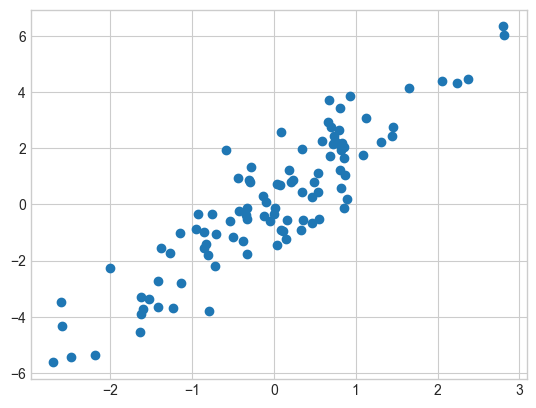

In [18]:
plt.scatter(X[:, 0], X[:, 1]);

In [19]:
indices = np.random.choice(X.shape[0], size=20, replace=False)

In [20]:
indices

array([78, 15, 91, 27, 79, 48, 49, 57,  5, 33, 71, 32,  9, 81, 20, 69, 13,
        3, 51, 85])

In [21]:
selection = X[indices]

In [22]:
selection.shape

(20, 2)

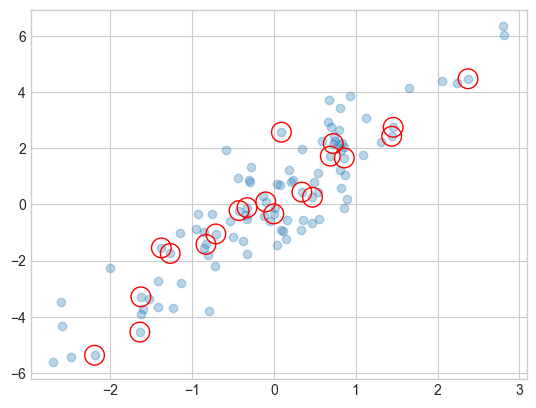

In [27]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3);
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='red', s=200);

## Example: Binning Data

In [28]:
rng = np.random.default_rng(seed=1701)

In [29]:
x = rng.normal(size=100)

In [31]:
x[:5]

array([ 0.43874206,  0.32818515,  0.68328838, -0.81928256,  0.69156442])

In [32]:
bins = np.linspace(-5, 5, 20)

In [34]:
bins, bins.size

(array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 20)

In [35]:
counts = np.zeros_like(bins)

In [36]:
counts.size

20

This is a somewhat involved function. The idea is that we have to find index `j` such that `bins[j-1] < x < bins[j]`.
> `numpy.searchsorted(a, v, side='left', sorter=None)`. Find indices where elements should be inserted to maintain order. Find the indices into a sorted array a such that, if the corresponding elements in v were inserted before the indices, the order of a would be preserved. `a[i-1] < v <= a[i]` (when `side='left'`)

In [37]:
i = np.searchsorted(bins, x)

In [52]:
i, i.size

(array([11, 11, 11,  8, 11,  7, 13,  8, 12,  8, 11, 10, 11,  9, 13,  9,  9,
         7, 11, 11, 13, 11,  8,  8, 11, 10, 13, 12, 10, 11,  7, 15, 10,  7,
        14,  8,  9, 11, 11,  9, 10, 13, 10,  7, 13, 11, 11, 13, 11, 11,  9,
         8, 12,  9,  8, 10, 11,  8, 11,  6,  8, 11,  8,  8, 11, 12, 11,  9,
        16, 11, 11, 10, 11, 11, 13, 10,  7,  8, 11, 11,  7,  9,  9, 11, 12,
         9, 11, 12, 14,  9, 11, 12, 10,  8, 10, 10,  9, 11,  8, 15]),
 100)

In [50]:
for xe, j in zip(x[:5], i[:5]):
    print(f"bins[j-1]={bins[j-1]:.2} < xe={xe:.2} < bins[j]={bins[j]:.2}")

bins[j-1]=0.26 < xe=0.44 < bins[j]=0.79
bins[j-1]=0.26 < xe=0.33 < bins[j]=0.79
bins[j-1]=0.26 < xe=0.68 < bins[j]=0.79
bins[j-1]=-1.3 < xe=-0.82 < bins[j]=-0.79
bins[j-1]=0.26 < xe=0.69 < bins[j]=0.79


Now we just add ones to `counts` using indicies above.
> `ufunc.at(a, indices, b=None, /)`
> Performs unbuffered in place operation on operand `a` for elements specified by `indices`. For addition ufunc, this method is equivalent to `a[indices] += b`

In [53]:
np.add.at(counts, i, 1)

In [54]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,
        8.,  2.,  2.,  1.,  0.,  0.,  0.])

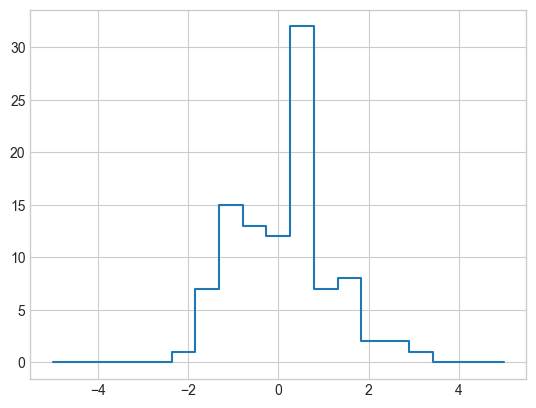

In [55]:
plt.plot(bins, counts, drawstyle='steps');

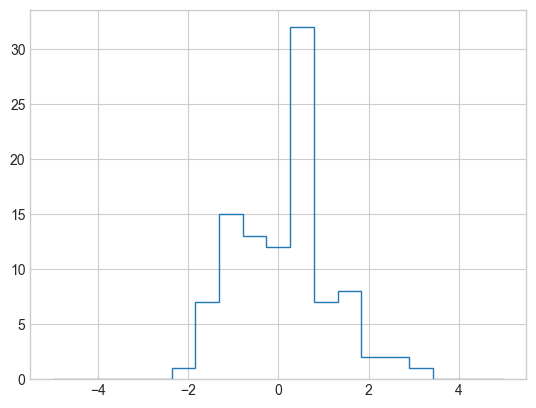

In [56]:
plt.hist(x, bins, histtype='step');

### Manual counting

Let's reproduce this count manually.

In [57]:
def find_place(bbins, xx):
    for i, b in enumerate(bbins):
        if xx < b:
            return i

In [59]:
i_man = [find_place(bins, xx) for xx in x]

In [60]:
i_man[:5]

[11, 11, 11, 8, 11]

In [62]:
np.all(i_man == i)

np.True_

In [70]:
def add_at(ccounts, ii, b=1):
    ccounts[ii] += b

In [71]:
counts_man = np.zeros_like(bins)

In [72]:
[add_at(counts_man, ii) for ii in i_man];

In [73]:
counts_man

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,
        8.,  2.,  2.,  1.,  0.,  0.,  0.])

In [75]:
np.all(counts_man == counts)

np.True_